In [2]:
import numpy as np 
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
import pandas as pd

In [46]:
data = pd.read_csv('hypothyroid.csv', na_values='?')

In [47]:
data[:5]

,hypothyroid,72,M,f,f.1,f.2,f.3,f.4,f.5,f.6,...,y.1,0.6,y.2,15,y.3,1.48,y.4,10,n,?
0,hypothyroid,15.0,F,t,f,f,f,f,f,f,...,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
1,hypothyroid,24.0,M,f,f,f,f,f,f,f,...,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
2,hypothyroid,24.0,F,f,f,f,f,f,f,f,...,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
3,hypothyroid,77.0,M,f,f,f,f,f,f,f,...,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN
4,hypothyroid,85.0,F,f,f,f,f,t,f,f,...,y,1.1,y,27.0,y,1.19,y,23.0,n,NaN


In [48]:
data.columns

Index(['hypothyroid', '72', 'M', 'f', 'f.1', 'f.2', 'f.3', 'f.4', 'f.5', 'f.6',
       'f.7', 'f.8', 'f.9', 'f.10', 'y', '30', 'y.1', '0.6', 'y.2', '15',
       'y.3', '1.48', 'y.4', '10', 'n', '?'],
      dtype='object')

In [49]:
df_encoded = pd.get_dummies(data)

In [50]:
df_encoded.columns

Index(['72', '30', '0.6', '15', '1.48', '10', '?', 'hypothyroid_hypothyroid',
       'hypothyroid_negative', 'M_F', 'M_M', 'f_f', 'f_t', 'f.1_f', 'f.1_t',
       'f.2_f', 'f.2_t', 'f.3_f', 'f.3_t', 'f.4_f', 'f.4_t', 'f.5_f', 'f.5_t',
       'f.6_f', 'f.6_t', 'f.7_f', 'f.7_t', 'f.8_f', 'f.8_t', 'f.9_f', 'f.9_t',
       'f.10_f', 'f.10_t', 'y_n', 'y_y', 'y.1_n', 'y.1_y', 'y.2_n', 'y.2_y',
       'y.3_n', 'y.3_y', 'y.4_n', 'y.4_y', 'n_n', 'n_y'],
      dtype='object')

In [51]:
dataset = df_encoded.drop(['?'],axis=1) 
dataset.dropna(inplace=True)
X = dataset.drop(['hypothyroid_hypothyroid','hypothyroid_negative'],axis=1)
y = dataset['hypothyroid_hypothyroid'] 

[Text(0.6, 0.8333333333333334, 'x[5] <= 64.5\nentropy = 0.316\nsamples = 1508\nvalue = [1422, 86]'),
 Text(0.4, 0.5, 'x[1] <= 5.95\nentropy = 0.904\nsamples = 122\nvalue = [39, 83]'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.206\nsamples = 31\nvalue = [30, 1]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.466\nsamples = 91\nvalue = [9, 82]'),
 Text(0.8, 0.5, 'entropy = 0.022\nsamples = 1386\nvalue = [1383, 3]')]

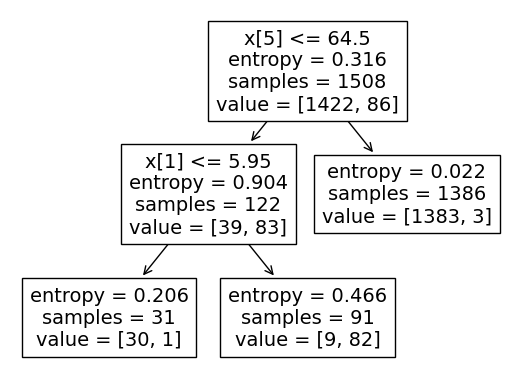

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5) 
clf.fit(X_train, y_train) 
tree.plot_tree(clf)

In [55]:
X_test.shape

(503, 42)

In [57]:
y_test

307     0
1924    0
2862    0
637     0
1270    0
       ..
2316    0
2819    0
234     0
441     0
1231    0
Name: hypothyroid_hypothyroid, Length: 503, dtype: uint8

In [58]:
k = 0
for x,y in zip(X_test,y_test):
    print([x],[y])
    prediccion = clf.predict([x])
    if prediccion[0] == y:
        k = k + 1
        
print('precision:', k/len(y_test))

['72'] [0]


/home/agustin/facultad/IntroML/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[72.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.